
This is a fun but challenging problem set. It will test your python skills, as well as your understanding of the material in class and in the readings. Start early and debug often! Some notes:

* Part 1 is meant to be easy, so get through it quickly.
* Part 2 (especially 2.1) will be difficult, but it is the lynchpin of this problem set to make sure to do it well and understand what you've done. If you find your gradient descent algorithm is taking more than a few minutes to complete, debug more, compare notes with others, and go to the Lab sessions (especially the sections on vectorized computation and computational efficiency).
* Depending on how well you've done 2.1, parts 2.3 and 4.3 will be relatively painless or incredibly painful. 

* Part 4 (especially 4.3) will be computationally intensive. Don't leave this until the last minute, otherwise your code might be running when the deadline arrives.

* Do the extra credit problems last. This can help you increase your scores

---

## Introduction to the assignment

As with the last assignment, you will be using the [Boston Housing Prices Data Set](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names).

In [1]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn

%matplotlib inline  
import matplotlib.pyplot as plt  
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf


In [2]:
data = np.loadtxt('data.txt')
target = np.loadtxt('target.txt')

boston = pd.DataFrame(data = data,
                      columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"])
boston['MEDV'] = target
boston.head()

# Load you data the Boston Housing data into a dataframe
# MEDV.txt containt the median house values and data.txt the other 13 features
# in order ["CRIM", "ZN", "INDUS", "CHAS", "NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]
# Your code here

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.218960,18.0,2.629288,0.0,0.869420,6.875396,65.2,4.347275,1.0,307.0,15.534711,397.462329,5.715647,24.0
1,0.141576,0.0,7.315612,0.0,0.549711,6.499894,78.9,5.315684,2.0,255.0,17.914131,397.012611,9.338417,21.6
2,0.380457,0.0,7.340354,0.0,0.697928,7.263489,61.1,5.356935,2.0,243.0,17.919989,396.628236,4.142473,34.7
3,0.313563,0.0,2.562407,0.0,0.599629,7.209732,45.8,6.103983,3.0,226.0,18.979527,398.564784,3.239272,33.4
4,0.330105,0.0,2.497337,0.0,0.476077,7.184111,54.2,6.264372,3.0,234.0,18.708888,399.487766,6.115159,36.2


---

## Part 1: Getting oriented


### 1.1 Use existing libraries

Soon, you will write your own gradient descent algorithm, which you will then use to minimize the squared error cost function.  First, however, let's use the canned versions that come with Python, to make sure we understand what we're aiming to achieve.

Using the same Boston housing prices dataset, use the [Linear Regression class](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from sklearn or the [OLS class](http://wiki.scipy.org/Cookbook/OLS) from SciPy to explore the relationship between median housing price and number of rooms per house. Do the following:

(a) Regress the housing price on the number of rooms per house. Draw a scatter plot of housing price (y-axis) against rooms (x-axis), and draw the regression line in blue.  You might want to make the dots semi-transparent if it improves the presentation of the figure. 

(b) Regress the housing price on the number of rooms per house and the (number of rooms per house) squared.  Show the (curved) regression line in green. 

(c) Interpret your results.

In [3]:
# a)
model1 = smf.ols(formula = 'MEDV ~ RM', data = boston).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     452.3
Date:                Sun, 06 Mar 2022   Prob (F-statistic):           4.12e-72
Time:                        17:27:28   Log-Likelihood:                -1678.2
No. Observations:                 506   AIC:                             3360.
Df Residuals:                     504   BIC:                             3369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -35.5762      2.748    -12.944      0.0

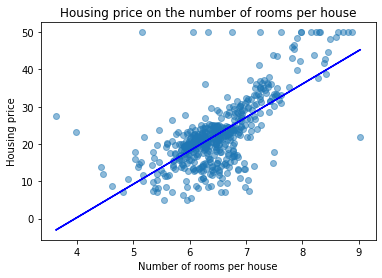

In [4]:
x1 = boston.RM.values
y1 = boston.MEDV.values
regression_line1 = 8.9599 * x1 - 35.5762

plt.figure()
plt.scatter(x1,y1,alpha=0.5)
plt.plot(x1,regression_line1,color = 'blue')
plt.xlabel('Number of rooms per house')
plt.ylabel('Housing price')
plt.title('Housing price on the number of rooms per house')
plt.show()


In [5]:
# b)
model2 = smf.ols(formula = 'MEDV ~ RM + np.power(RM,2)', data = boston).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     294.5
Date:                Sun, 06 Mar 2022   Prob (F-statistic):           2.19e-85
Time:                        17:27:28   Log-Likelihood:                -1644.1
No. Observations:                 506   AIC:                             3294.
Df Residuals:                     503   BIC:                             3307.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          71.7363     12.865     

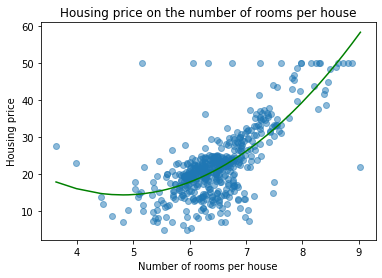

In [6]:
x2 = boston.RM
x2_sorted = x2.sort_values()
y2 = boston.MEDV.values
regression_line2 = -23.7896*x2_sorted + 2.4691*x2_sorted**2 + 71.7363

plt.figure()
plt.scatter(x2.values,y2,alpha=0.5)
plt.plot(x2_sorted,regression_line2,color = 'green')
plt.xlabel('Number of rooms per house')
plt.ylabel('Housing price')
plt.title('Housing price on the number of rooms per house')
plt.show()

If we represent the MEDV value to be y and RM value to be x.  
The first model which regresses the housing price on the number of rooms per house has the formula of 
y=8.9599 * x - 35.5762. And the R-square of the model is 0.473 which provides a measure of how well observed outcomes are replicated by the model.  
The seconde model which regresses the housing price on the number of rooms per house and the (number of rooms per house) squared has the formula of y=-23.7896 * x + 2.4691 * (x\**2) + 71.7363. And the R-sqaure of this model is 0.539 which is bigger than the first one, meaning that this model is better


### 1.2 Training and testing

Chances are, for the above problem you used all of your data to fit the regression line. In some circumstances this is a reasonable thing to do, but often this will result in overfitting. Let's redo the above results the ML way, using careful cross-validation.  Since you are now experts in cross-validation, and have written your own cross-validation algorithm from scratch, you can now take a shortcut and use the libraries that others have built for you.

Using the [cross-validation functions](http://scikit-learn.org/stable/modules/cross_validation.html) from scikit-learn, use 5-fold cross-validation to fit the regression model (a) from 1.1, i.e. the linear fit of housing price on number of rooms per house. Each fold of cross-validation will give you one slope coefficient and one intercept coefficient.  Create a new scatterplot of housing price against rooms, and draw the five different regression lines in light blue, and the oroginal regression line from 1.1 in red (which was estimated using the full dataset). What do you notice?

In [7]:
from sklearn.model_selection import KFold

X = boston.RM
Y = boston.MEDV

n_folds = 5
kf = KFold(n_splits = n_folds, shuffle = True, random_state = 42)

train_index = []
test_index = []
for train, test in kf.split(X):
    train_index.append(train)
    test_index.append(test)
    
slope_coef = np.zeros(n_folds)
inter_coef = np.zeros(n_folds)

for i in range(n_folds):
    model = LinearRegression().fit(X[train_index[i]].values.reshape(-1,1), Y[train_index[i]])
    slope_coef[i] = model.coef_[0]
    inter_coef[i] = model.intercept_

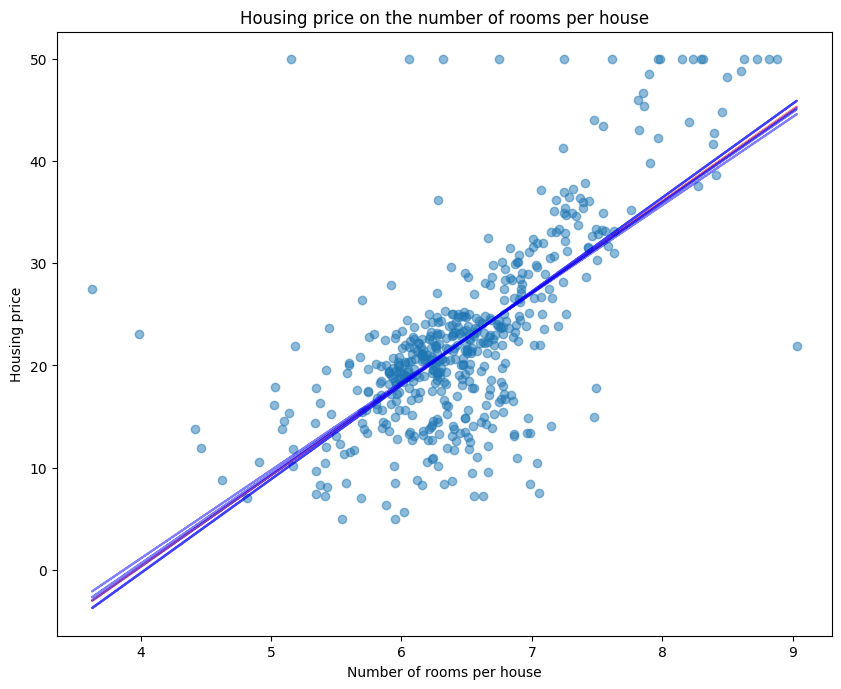

In [8]:
x1 = boston.RM.values
y1 = boston.MEDV.values
regression_line1 = 8.9599 * x1 - 35.5762
cv_line1 = slope_coef[0] * x1 + inter_coef[0]
cv_line2 = slope_coef[1] * x1 + inter_coef[1]
cv_line3 = slope_coef[2] * x1 + inter_coef[2]
cv_line4 = slope_coef[3] * x1 + inter_coef[3]
cv_line5 = slope_coef[4] * x1 + inter_coef[4]

plt.figure(figsize=(10, 8), dpi=100)
plt.scatter(x1,y1,alpha=0.5)
plt.plot(x1,regression_line1,color = 'red',alpha=0.5)
plt.plot(x1,cv_line1,color='blue',alpha=0.5)
plt.plot(x1,cv_line2,color='blue',alpha=0.5)
plt.plot(x1,cv_line3,color='blue',alpha=0.5)
plt.plot(x1,cv_line4,color='blue',alpha=0.5)
plt.plot(x1,cv_line5,color='blue',alpha=0.5)
plt.xlabel('Number of rooms per house')
plt.ylabel('Housing price')
plt.title('Housing price on the number of rooms per house')
plt.show()

In [9]:
print('Original slope coefficient:')
print('8.9599')
print('Cross-validated slope coefficient:')
print(slope_coef)
print('Mean of slope coefficient from 5-folds cross-validation')
print(np.mean(slope_coef))
print()
print('Original intercept coefficient')
print('- 35.5762')
print('Cross-validated intercept coefficient')
print(inter_coef)
print('Mean of intercept coefficient from 5-folds cross-validation')
print(np.mean(inter_coef))

Original slope coefficient:
8.9599
Cross-validated slope coefficient:
[9.19551094 8.65171297 9.19725403 8.84351098 8.92386374]
Mean of slope coefficient from 5-folds cross-validation
8.96237053230043

Original intercept coefficient
- 35.5762
Cross-validated intercept coefficient
[-37.10833606 -33.52291068 -37.15725093 -34.7879279  -35.38499126]
Mean of intercept coefficient from 5-folds cross-validation
-35.59228336459531


From both picture and number, we can see that the difference between original coefficient and cross-validated coefficient is quite small, or to say there may be no significant difference in terms of slope coefficient and intercept coefficient. They are quite close between original one and ones from cross-validation

## Part 2: Gradient descent: Linear Regression

This is where it gets fun!

### 2.1 Implement gradient descent with one independent variable (average rooms per house)

Implement the batch gradient descent algorithm that we discussed in class. Use the version you implement to regress the housing price on the number of rooms per house. Experiment with 3-4 different values of the learning rate *R*, and do the following:

* Report the values of alpha and beta that minimize the loss function
* Report the number of iterations it takes for your algorithm to converge (for each value of *R*)
* Report the total running time of your algorithm, in seconds
* How do your coefficients compare to the ones estimated through standard libraries? Does this depend on *R*?

Some skeleton code is provided below, but you should feel free to delete this code and start from scratch if you prefer.

* *Hint 1: Don't forget to implement a stopping condition, so that at every iteration you check whether your results have converged. Common approaches to this are to (a) check to see if the loss has stopped decreasing; and (b) check if both your current parameter esimates are close to the estimates from the previous iteration.  In both cases, "close" should not be ==0, it should be <=epsilon, where epsilon is something very small (like 0.0001).*
* *Hint 2: Some people like to include a MaxIterations parameter in their gradient descent algorithm, to prevent divergence. *

In [10]:
import time

"""
Function
--------
bivariate_ols
    Gradient Decent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression

Parameters
----------
xvalues, yvalues : narray
    xvalues: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    

Returns
-------
alpha: float
    intercept
    
beta: float
    co-efficient
"""
def bivariate_ols(xvalues, yvalues, alpha_initial, beta_initial, R=0.01, epsilon=0.0001, MaxIterations=10000):
    start_time = time.time()
    alpha = alpha_initial
    beta = beta_initial   
    N = len(yvalues)

    for i in range(MaxIterations):
        new_alpha = alpha - ((R/N) * np.sum(alpha + beta*xvalues - yvalues))
        new_beta = beta - ((R/N) * np.sum((alpha + beta*xvalues - yvalues)*xvalues))

        if (np.abs(new_alpha-alpha)<epsilon) and (np.abs(new_beta-beta)<epsilon):
            alpha = new_alpha
            beta = new_beta
            break
        else:
            alpha = new_alpha
            beta = new_beta

    iteration_num = i+1 
     
    print("Total Iterations: "+ str(iteration_num))
    print("Time taken: {:.2f} seconds".format(time.time() - start_time))
    
    return alpha, beta 

In [11]:
X = boston.RM.values
Y = boston.MEDV.values

alpha_initial = -20
beta_initial = 5

print('The learning rate R: 0.01')
alpha, beta = bivariate_ols(X,Y,alpha_initial, beta_initial, R=0.01,epsilon=0.0001,MaxIterations=100000)
print('alpha = {:.2f}'.format(alpha))
print('beta = {:.2f}'.format(beta))
print()
print('The learning rate R: 0.03')
alpha, beta = bivariate_ols(X,Y,alpha_initial, beta_initial, R=0.03,epsilon=0.0001,MaxIterations=100000)
print('alpha = {:.2f}'.format(alpha))
print('beta = {:.2f}'.format(beta))
print()
print('The learning rate R: 0.045')
alpha, beta = bivariate_ols(X,Y,alpha_initial, beta_initial, R=0.045,epsilon=0.0001,MaxIterations=100000)
print('alpha = {:.2f}'.format(alpha))
print('beta = {:.2f}'.format(beta))
print()
print('The learning rate R: 0.005')
alpha, beta = bivariate_ols(X,Y,alpha_initial, beta_initial, R=0.005,epsilon=0.0001,MaxIterations=100000)
print('alpha = {:.2f}'.format(alpha))
print('beta = {:.2f}'.format(beta))
print()
print('The learning rate R: 0.009')
alpha, beta = bivariate_ols(X,Y,alpha_initial, beta_initial, R=0.009,epsilon=0.0001,MaxIterations=100000)
print('alpha = {:.2f}'.format(alpha))
print('beta = {:.2f}'.format(beta))

The learning rate R: 0.01
Total Iterations: 25336
Time taken: 0.52 seconds
alpha = -34.70
beta = 8.83

The learning rate R: 0.03
Total Iterations: 11651
Time taken: 0.23 seconds
alpha = -35.28
beta = 8.92

The learning rate R: 0.045
Total Iterations: 8556
Time taken: 0.17 seconds
alpha = -35.38
beta = 8.93

The learning rate R: 0.005
Total Iterations: 38535
Time taken: 0.79 seconds
alpha = -33.83
beta = 8.69

The learning rate R: 0.009
Total Iterations: 27126
Time taken: 0.53 seconds
alpha = -34.60
beta = 8.81


The coefficients estimated through standard libraries (alpha = -35.58, beta = 8.96) are close to the ones using gradient descent. But it really depends on the R(learning rate) given the same max iterations and epsilon. And different learning rates result in different iteration numbers and running time

### 2.2 Data normalization (done for you!)

Soon, you will implement a version of gradient descent that can use an arbitrary number of independent variables. Before doing this, we want to give you some code in case you want to standardize your features.

In [12]:
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

### 2.3 Implement gradient descent with an arbitrary number of independent variables

Now that you have a simple version of gradient descent working, create a version of gradient descent that can take more than one independent variable.  Assume all independent variables will be continuous.  Test your algorithm using TAX and RM as independent variables. Standardize these variables before inputting them to the gradient descent algorithm. 

As before,  report and interpret your estimated coefficients, the number of iterations before convergence, and the total running time of your algorithm. Experiment with 2-3 different values of R.

* *Hint 1: Be careful to implement this efficiently, otherwise it might take a long time for your code to run. Commands like `np.dot` can be a good friend to you on this problem*

In [13]:
"""
Function
--------
multivariate_ols
    Gradient Decent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression

Parameters
----------
xvalue_matrix, yvalues : narray
    xvalue_matrix: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    

Returns
-------
alpha: float
    intercept
    
beta_array: array[float]
    co-efficient
"""

def multivariate_ols(xvalue_matrix, yvalues, alpha_initial, beta_initial, R=0.01, epsilon=0.0001, MaxIterations=1000):
    
    start_time = time.time()
    alpha = alpha_initial
    beta = beta_initial
    
    N = len(yvalues)
    
    for i in range(MaxIterations):
        
        new_alpha = alpha - ((R/N) * (alpha + np.dot(xvalue_matrix, beta) - yvalues).sum())
        new_beta = beta - ((R/N) * np.dot(xvalue_matrix.T, (alpha + np.dot(xvalue_matrix, beta) - yvalues)))
        
        if np.all((np.abs(new_alpha - alpha)) < epsilon) and (np.abs(new_beta - beta).all() < epsilon):
            alpha = new_alpha
            beta = new_beta
            break
        else:
            alpha = new_alpha
            beta = new_beta
            
    iteration_num = i+1
    
    print("Total Iterations: "+ str(iteration_num))
    print("Time taken: {:.2f} seconds".format(time.time() - start_time))
    
    return alpha, beta

In [14]:
X = boston[['TAX','RM']].values
X = standardize(X)
Y = boston.MEDV.values

alpha_initial = 0
beta_initial = np.array([0,0])

print('The learning rate R: 0.1')
alpha, beta = multivariate_ols(X,Y,alpha_initial, beta_initial, R=0.1,epsilon=0.0001,MaxIterations=10000)
print('alpha = {:.2f}'.format(alpha))
print('beta = {:.2f}, {:.2f}'.format(beta[0], beta[1]))
print()
print('The learning rate R: 0.01')
alpha, beta = multivariate_ols(X,Y,alpha_initial, beta_initial, R=0.01,epsilon=0.0001,MaxIterations=10000)
print('alpha = {:.2f}'.format(alpha))
print('beta = {:.2f}, {:.2f}'.format(beta[0], beta[1]))
print()
print('The learning rate R: 0.001')
alpha, beta = multivariate_ols(X,Y,alpha_initial, beta_initial, R=0.001,epsilon=0.0001,MaxIterations=10000)
print('alpha = {:.2f}'.format(alpha))
print('beta = {:.2f}, {:.2f}'.format(beta[0], beta[1]))


The learning rate R: 0.1
Total Iterations: 447
Time taken: 0.03 seconds
alpha = 22.53
beta = -2.72, 5.54

The learning rate R: 0.01
Total Iterations: 4278
Time taken: 0.11 seconds
alpha = 22.53
beta = -2.72, 5.54

The learning rate R: 0.001
Total Iterations: 10000
Time taken: 0.22 seconds
alpha = 22.53
beta = -2.72, 5.54


In this case, the sufficient small learning rate is able to provide quite accurate results. And with the increase in the learning rate, the results stay the same, however, the running time and iteration numbers experienced a sharp decrease.

### 2.4 Compare standardized vs. non-standardized results

Repeat the analysis from 2.3, but this time do not standardize your variables - i.e., use the original data. Use the same three values of R (0.1, 0.01, and 0.001). What do you notice about the running time and convergence properties of your algorithm?

In [15]:
X = boston[['TAX','RM']].values
Y = boston.MEDV.values

alpha_initial = 0
beta_initial = np.array([0,0])

print('The learning rate R: 0.1')
alpha, beta = multivariate_ols(X,Y,alpha_initial, beta_initial, R=0.1,epsilon=0.0001,MaxIterations=1000000)
print('alpha = {:.2f}'.format(alpha))
print('beta = {:.2f}, {:.2f}'.format(beta[0], beta[1]))
print()
print('The learning rate R: 0.01')
alpha, beta = multivariate_ols(X,Y,alpha_initial, beta_initial, R=0.01,epsilon=0.0001,MaxIterations=1000000)
print('alpha = {:.2f}'.format(alpha))
print('beta = {:.2f}, {:.2f}'.format(beta[0], beta[1]))
print()
print('The learning rate R: 0.001')
alpha, beta = multivariate_ols(X,Y,alpha_initial, beta_initial, R=0.001,epsilon=0.0001,MaxIterations=1000000)
print('alpha = {:.2f}'.format(alpha))
print('beta = {:.2f}, {:.2f}'.format(beta[0], beta[1]))


The learning rate R: 0.1


/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/var/folders/4j/ry7_scw962q90x2629f31m2m0000gn/T/ipykernel_42058/2417818275.py:39: RuntimeWarning: invalid value encountered in double_scalars
  new_alpha = alpha - ((R/N) * (alpha + np.dot(xvalue_matrix, beta) - yvalues).sum())
/var/folders/4j/ry7_scw962q90x2629f31m2m0000gn/T/ipykernel_42058/2417818275.py:40: RuntimeWarning: invalid value encountered in subtract
  new_beta = beta - ((R/N) * np.dot(xvalue_matrix.T, (alpha + np.dot(xvalue_matrix, beta) - yvalues)))


Total Iterations: 1000000
Time taken: 19.54 seconds
alpha = nan
beta = nan, nan

The learning rate R: 0.01
Total Iterations: 1000000
Time taken: 19.70 seconds
alpha = nan
beta = nan, nan

The learning rate R: 0.001
Total Iterations: 1000000
Time taken: 19.29 seconds
alpha = nan
beta = nan, nan


With not standarized data, even I increase the max iteration number to 1000000, the function still does not work and raise the error. It takes much longer time to converage, compared to the one using standarized data. As a result of the comparison, we better use standarized data while using gradient descent.

## 3. Prediction

Let's use our fitted model to make predictions about housing prices. Make sure to first standardize your features before proceeding.

### 3.1 Cross-Validation

Unless you were careful above, you probably overfit your data again. Let's fix that. Use 5-fold cross-validation to re-fit the multivariate regression from 2.3 above, and report your estimated coefficients (there should be three, corresponding to the intercept and the two coefficients for TAX and RM). Since there are 5 folds, there will be 5 sets of three coefficients -- report them all in a 5x3 table.

In [16]:
X = boston[['TAX','RM']].values
X = standardize(X)
Y = boston.MEDV.values

n_folds = 5
kf = KFold(n_splits = n_folds, shuffle = True, random_state = 42)

train_index = []
test_index = []
for train, test in kf.split(X):
    train_index.append(train)
    test_index.append(test)
    
slope_coef1 = np.zeros(n_folds)
slope_coef2 = np.zeros(n_folds)
inter_coef = np.zeros(n_folds)
alpha_initial = 0
beta_initial = np.array([0,0])

for i in range(n_folds):
    alpha, beta = multivariate_ols(X[train_index[i]],Y[train_index[i]],alpha_initial, beta_initial, R=0.1,epsilon=0.0001,MaxIterations=10000)
    slope_coef1[i] = beta[0]
    slope_coef2[i] = beta[1]
    inter_coef[i] = alpha

Total Iterations: 431
Time taken: 0.03 seconds
Total Iterations: 420
Time taken: 0.02 seconds
Total Iterations: 469
Time taken: 0.02 seconds
Total Iterations: 462
Time taken: 0.01 seconds
Total Iterations: 434
Time taken: 0.01 seconds


In [17]:
data = [slope_coef1, slope_coef2, inter_coef]
cv = pd.DataFrame(data, 
                  columns = ['fold1', 'fold2','fold3','fold4','fold5'],
                  index = ['slope coef for TAX',
                           'slope coef for RM',
                           'intercept'])
cv
 

,fold1,fold2,fold3,fold4,fold5
slope coef for TAX,-2.725358,-2.708377,-2.744314,-2.544492,-2.898158
slope coef for RM,5.758609,5.289355,5.675882,5.534835,5.440624
intercept,22.490872,22.615248,22.463017,22.591117,22.500014


In [18]:
print('slope coef for TAX = {:.2f}'.format(np.mean(slope_coef1)))
print('slope coef for RM = {:.2f}'.format(np.mean(slope_coef2)))
print('intercept coef = {:.2f}'.format(np.mean(inter_coef)))

slope coef for TAX = -2.72
slope coef for RM = 5.54
intercept coef = 22.53


The result from 2.3 is that the intercept is 22.53, the slope coefficient for TAX is -2.72 and the slope coefficient for RM is 5.54. The cross-validation result looks quite closed to the multivariate regression result from 2.3. And if we take the mean value of the cross-validation result, it appears to be the same as the regression result

### 3.2 Predicted values and RMSE

Let's figure out how accurate this predictive model turned out to be. Compute the cross-validated RMSE for each of the 5 folds above. In other words, in fold 1, use the parameters estimated on the 80% of the data to make predictions for the 20%, and calculate the RMSE for those 20%. Repeate this for the remaining folds. Report the RMSE for each of the 5-folds, and the average (mean) RMSE across the five folds. How does this average RMSE compare to the performance of your nearest neighbor algorithm from the last problem set?

In [19]:
def compute_rmse(predictions, yvalues):
    pred = np.array(predictions)
    y = np.array(yvalues)
    rmse = np.sqrt(np.sum((pred-y) ** 2) / float(len(y)))
    return rmse

In [20]:
X = boston[['TAX','RM']].values
X = standardize(X)
Y = boston.MEDV.values

n_folds = 5
kf = KFold(n_splits = n_folds, shuffle = True, random_state = 42)

train_index = []
test_index = []
for train, test in kf.split(X):
    train_index.append(train)
    test_index.append(test)
    
slope_coef1 = np.zeros(n_folds)
slope_coef2 = np.zeros(n_folds)
inter_coef = np.zeros(n_folds)
rmse = np.zeros(n_folds)

for i in range(n_folds):
    alpha, beta = multivariate_ols(X[train_index[i]],Y[train_index[i]],alpha_initial, beta_initial, R=0.1,epsilon=0.0001,MaxIterations=10000)
    prediction = np.dot(X[test_index[i]],beta) + alpha
    rmse[i] = compute_rmse(prediction,Y[test_index[i]])
    slope_coef1[i] = beta[0]
    slope_coef2[i] = beta[1]
    inter_coef[i] = alpha

Total Iterations: 431
Time taken: 0.02 seconds
Total Iterations: 420
Time taken: 0.02 seconds
Total Iterations: 469
Time taken: 0.02 seconds
Total Iterations: 462
Time taken: 0.02 seconds
Total Iterations: 434
Time taken: 0.03 seconds


In [21]:
data = [slope_coef1, slope_coef2, inter_coef,rmse]
cv = pd.DataFrame(data, 
                  columns = ['fold1', 'fold2','fold3','fold4','fold5'],
                  index = ['slope coef for TAX',
                           'slope coef for RM',
                           'intercept',
                           'RMSE'])
cv

,fold1,fold2,fold3,fold4,fold5
slope coef for TAX,-2.725358,-2.708377,-2.744314,-2.544492,-2.898158
slope coef for RM,5.758609,5.289355,5.675882,5.534835,5.440624
intercept,22.490872,22.615248,22.463017,22.591117,22.500014
RMSE,6.364575,5.392231,6.792389,6.199641,6.019956


In [22]:
print('Average RMSE = {:.2f}'.format(np.mean(rmse)))

Average RMSE = 6.15


The RMSE for each fold is shown on the above dataframe and the average RMSE is 6.15. After reruning the 5 fold cross-validation 5-Nearst Neighbor Algorithm, the RMSE is 4.97, which is smaller than that of using gradient descent.

### Extra Credit 1: Logistic Regression

For extra credit, implement logistic regression using gradient descent. Create a new variable (EXPENSIVE) to indicate whether the median housing price is more than $40,000. Use your model  a logistic regression of EXPENSIVE on CHAS and RM. Report your results.

In [23]:
boston['EXPENSIVE'] = boston.apply(lambda x: 1 if x['MEDV'] > 40 else 0, axis = 1)
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,EXPENSIVE
0,0.218960,18.0,2.629288,0.0,0.869420,6.875396,65.2,4.347275,1.0,307.0,15.534711,397.462329,5.715647,24.0,0
1,0.141576,0.0,7.315612,0.0,0.549711,6.499894,78.9,5.315684,2.0,255.0,17.914131,397.012611,9.338417,21.6,0
2,0.380457,0.0,7.340354,0.0,0.697928,7.263489,61.1,5.356935,2.0,243.0,17.919989,396.628236,4.142473,34.7,0
3,0.313563,0.0,2.562407,0.0,0.599629,7.209732,45.8,6.103983,3.0,226.0,18.979527,398.564784,3.239272,33.4,0
4,0.330105,0.0,2.497337,0.0,0.476077,7.184111,54.2,6.264372,3.0,234.0,18.708888,399.487766,6.115159,36.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.205345,0.0,11.992590,0.0,0.686750,6.895386,69.1,2.805111,1.0,282.0,21.325449,395.822256,9.795056,22.4,0
502,0.120722,0.0,11.994115,0.0,0.583991,6.313574,76.7,2.652694,1.0,282.0,21.032632,398.559567,9.785685,20.6,0
503,0.226099,0.0,12.254201,0.0,0.689092,7.199346,91.0,2.348891,1.0,284.0,21.042043,398.026747,5.831161,23.9,0
504,0.139833,0.0,12.054379,0.0,0.650875,7.065029,89.3,2.783274,1.0,275.0,21.105130,395.290366,6.890841,22.0,0


In [24]:
def multivariate_reg_ols(xvalue_matrix, yvalues, alpha_initial, beta_initial, R=0.01, epsilon=0.0001, MaxIterations=1000):
    start_time = time.time()
    alpha = alpha_initial
    beta = beta_initial
    N = len(yvalues)
    
    for i in range(MaxIterations):
        h_theta = yvalues - 1.0/(1+np.exp(-(alpha + np.dot(xvalue_matrix,beta))))
        new_alpha = alpha + (R/N) * h_theta.sum()
        new_beta = beta + (R/N) * np.dot(xvalue_matrix.T, h_theta)
        
        if np.all((np.abs(new_alpha - alpha)) < epsilon) and (np.abs(new_beta - beta).all() < epsilon):
            alpha = new_alpha
            beta = new_beta
            break
        else:
            alpha = new_alpha
            beta = new_beta
            
    iteration_num = i+1
    
    print("Total Iterations: "+ str(iteration_num))
    print("Time taken: {:.2f} seconds".format(time.time() - start_time))
    
    return alpha, beta

In [25]:
X = boston[['CHAS','RM']].values
X = standardize(X)
Y = boston.EXPENSIVE.values

alpha_initial = 0
beta_initial = np.array([0,0])

print('The learning rate R: 0.1')
alpha, beta = multivariate_reg_ols(X,Y,alpha_initial, beta_initial, R=0.1,epsilon=0.0001,MaxIterations=100000)
print('alpha = {:.2f}'.format(alpha))
print('beta = {:.2f}, {:.2f}'.format(beta[0], beta[1]))
print()
print('The learning rate R: 0.01')
alpha, beta = multivariate_reg_ols(X,Y,alpha_initial, beta_initial, R=0.01,epsilon=0.0001,MaxIterations=100000)
print('alpha = {:.2f}'.format(alpha))
print('beta = {:.2f}, {:.2f}'.format(beta[0], beta[1]))
print()
print('The learning rate R: 0.001')
alpha, beta = multivariate_reg_ols(X,Y,alpha_initial, beta_initial, R=0.005,epsilon=0.0001,MaxIterations=100000)
print('alpha = {:.2f}'.format(alpha))
print('beta = {:.2f}, {:.2f}'.format(beta[0], beta[1]))

The learning rate R: 0.1
Total Iterations: 36877
Time taken: 1.07 seconds
alpha = -4.50
beta = 0.32, 2.11

The learning rate R: 0.01
Total Iterations: 100000
Time taken: 3.05 seconds
alpha = -4.50
beta = 0.32, 2.11

The learning rate R: 0.001
Total Iterations: 100000
Time taken: 3.06 seconds
alpha = -4.47
beta = 0.32, 2.09


## 4 Regularization 

### 4.1 Get prepped

Step 1: Create new interaction variables between each possible pair of the F_s features. If you originally had *K* features, you should now have K+(K*(K+1))/2 features. Standardize all of your features.

Step 2: Randomly sample 80% of your data and call this the training set, and set aside the remaining 20% as your test set.

In [26]:
boston.drop('EXPENSIVE',axis = 1,inplace = True)
boston_interact = boston.copy()

n = len(boston_interact.columns) - 1

for i in range(n):
    for j in range(i,n):
        new_col = boston_interact.columns[i] + '*' + boston_interact.columns[j]
        boston_interact[new_col] = boston_interact[boston_interact.columns[i]] * boston_interact[boston_interact.columns[j]]

In [27]:
print(len(boston.columns)-1)
print(len(boston_interact.columns)-1)

13
104


In [28]:
boston_interact.drop('MEDV',axis=1,inplace = True)
boston_interact['MEDV'] = target

In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(boston_interact.iloc[:,0:104],
                                                    boston_interact.iloc[:,-1],
                                                    test_size = 0.2,
                                                    random_state = 42,
                                                    shuffle = True)

In [30]:
x_train = standardize(x_train)
x_test = standardize(x_test)

In [31]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(404, 104)
(404,)
(102, 104)
(102,)


### 4.2 Overfitting (sort of)
Now, using your version of multivariate regression from 2.3, let's overfit the training data. Using your training set, regress housing price on as many of those K+(K*(K+1))/2 features as you can (Don't forget to add quadratic terms. Form instance, RM^2.).  If you get too greedy, it's possible this will take a long time to compute, so start with 5-10 features, and if you have the time, add more features.

Report the RMSE when you apply your model to your training set and to your testing set. How do these numbers compare to each other, and to the RMSE from 3.2 and nearest neighbors?

In [32]:
features = ['RM','CRIM','DIS','RM*RM','CRIM*RM','NOX*NOX','CHAS','TAX*B']

x_train1 = x_train.loc[:,features]
y_train1 = y_train.copy()

alpha_initial = 0
beta_initial = np.zeros(len(features))

alpha, beta = multivariate_ols(x_train1, y_train1, alpha_initial, beta_initial, R=0.02,epsilon=0.0001,MaxIterations=10000)
print('alpha = {:.2f}'.format(alpha))
print('betas')
print(beta)



Total Iterations: 10000
Time taken: 4.74 seconds
alpha = 22.80
betas
[-7.19257636e+00  5.26628236e+00  1.21090440e-02  1.35150547e+01
 -7.31032986e+00 -1.35567570e+00  9.88744711e-01  3.66640165e-01]


In [33]:
y_train_predict = alpha + np.dot(x_train1,beta)

x_test1 = x_test.loc[:,features]
y_test1 = y_test.copy()

y_test_predict = alpha + np.dot(x_test1,beta)

print('RMSE on the training set')
print(compute_rmse(y_train_predict,y_train1))
print()
print('RMSE on the test set')
print(compute_rmse(y_test_predict,y_test1))

RMSE on the training set
5.585851036238043

RMSE on the test set
5.427067409545281


The RMSE on both training set and test set are quite small. The RMSE on the training set is 5.59 and the RMSE on the test set in 5.43 which is a little bigger than that of the training set and it's reasonable.  
The RMSE from 3.2 is 6.15 and the RMSE from 5-Nearst-Neighbor is 4.97.

### 4.3 Ridge regularization (basic)
Incorporate L2 (Ridge) regularization into your multivariate_ols regression. Write a new version of your gradient descent algorithm that includes a regularization term "lambda" to penalize excessive complexity. 

Use your regularized regression to re-fit the model from 4.2 above on your training data, using the value lambda = 0.5.  Report the RMSE obtained for your training data, and the RMSE obtained for your testing data.

In [34]:
def multivariate_ridge_ols(xvalue_matrix, yvalues, alpha_initial, beta_initial, epsilon, lambda_reg, R=0.01, MaxIterations=10000):
    
    start_time = time.time()
    
    alpha = alpha_initial
    beta = beta_initial
    N = len(yvalues)
    
    for i in range(MaxIterations):
        
        new_alpha = alpha - R/N * ((alpha + np.dot(xvalue_matrix, beta) - yvalues).sum())
        new_beta = beta - R/N * (np.dot(xvalue_matrix.T, (alpha + np.dot(xvalue_matrix, beta) - yvalues)) + lambda_reg * beta)
        
        if (np.abs(new_alpha - alpha) < epsilon) and np.all(np.abs(new_beta - beta) < epsilon):
            alpha = new_alpha
            beta = new_beta
            break
        else:
            alpha = new_alpha
            beta = new_beta
    
    iteration_num = i + 1
    
    print("Total Iterations: "+ str(iteration_num))
    print("Time taken: {:.2f} seconds".format(time.time() - start_time))
    
    return alpha, beta

In [35]:
features = ['RM','CRIM','DIS','RM*RM','CRIM*RM','NOX*NOX','CHAS','TAX*B']

x_train2 = x_train.loc[:,features]
y_train2 = y_train.copy()

alpha_initial = 0
beta_initial = np.zeros(len(features))

alpha, beta = multivariate_ridge_ols(x_train2, y_train2, alpha_initial, beta_initial,epsilon=0.0001,lambda_reg = 0.5, R=0.02,MaxIterations=10000)
print('alpha = {:.2f}'.format(alpha))
print('betas')
print(beta)

Total Iterations: 10000
Time taken: 4.45 seconds
alpha = 22.80
betas
[-6.23611857  4.74125091 -0.01969389 12.53257754 -6.78626593 -1.37565777
  0.99251341  0.375143  ]


In [36]:
y_train_predict2 = alpha + np.dot(x_train2,beta)

x_test2 = x_test.loc[:,features]
y_test2 = y_test.copy()

y_test_predict2 = alpha + np.dot(x_test2,beta)

print('RMSE on the training set')
print(compute_rmse(y_train_predict2,y_train2))
print()
print('RMSE on the test set')
print(compute_rmse(y_test_predict2,y_test2))

RMSE on the training set
5.599056771070784

RMSE on the test set
5.488801361592794


By using ridge regression, the RMSE on the training set is 5.60 and the RMSE on the test set is 5.49. Both of them are a little bit higher than that of not using regulation.

### 4.4: Cross-validate lambda

This is where it all comes together! Use k-fold cross-validation to select the optimal value of lambda. In other words, define a set of different values of lambda. Then, using the 80% of your data that you set aside for training, iterate through the values of lambda one at a time. For each value of lambda, use k-fold cross-validation to compute the average cross-validated (test) RMSE for that lambda value, computed as the average across the held-out folds. You should also record the average cross-validated train RMSE, computed as the average across the folds used for training. Create a scatter plot that shows RMSE as a function of lambda. The scatter plot should have two lines: a red line showing the cross-validated (test) RMSE, and a blue line showing the cross-validated train RMSE.  At this point, you should not have touched your held-out 20% of "true" test data.

What value of lambda minimizes your cross-validated (test) RMSE? Fix that value of lambda, and train a new model using all of your training data with that value of lambda (i.e., use the entire 80% of the data that you set aside in 4.1). Calcuate the RMSE for this model on the 20% of "true" test data. How does your test RMSE compare to the RMSE from 4.3, 4.2, 2.3, and to the RMSE from nearest neighbors? What do you make of these results?

Go brag to your friends about how you just implemented cross-validated ridge-regularized multivariate regression using gradient descent optimization, from scratch. If you still have friends.

In [53]:
features1 = ['RM','CRIM','DIS','RM*RM','CRIM*RM','NOX*NOX','CHAS','TAX*B']

X = x_train.loc[:,features1].values
Y = y_train.values

n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

train_idx = []
test_idx = []
for train, test in kf.split(X):
    train_idx.append(train)
    test_idx.append(test)

lambda_range = np.linspace(0,20,100)

train_RMSE = []
valid_RMSE = []

for i in range(len(lambda_range)):
    
    train_rmse_split = []
    valid_rmse_split = []
    
    lambda_reg = lambda_range[i]
    
    for j in range(n_splits):
        
        x_train_cv = X[train_idx[j]]
        x_valid_cv = X[test_idx[j]]
        y_train_cv = Y[train_idx[j]]
        y_valid_cv = Y[test_idx[j]]
        
        alpha_initial = 0
        beta_initial = np.zeros(X.shape[1])
        
        alpha_ridge, beta_ridge = multivariate_ridge_ols(x_train_cv,y_train_cv, alpha_initial, beta_initial, epsilon=0.0001,lambda_reg = lambda_reg, R=0.02,MaxIterations=10000)
        
        y_train_predict = alpha_ridge + np.dot(x_train_cv, beta_ridge)
        y_valid_predict = alpha_ridge + np.dot(x_valid_cv, beta_ridge)
        
        rmse_train = compute_rmse(y_train_predict, y_train_cv)
        rmse_valid = compute_rmse(y_valid_predict, y_valid_cv)
        
        train_rmse_split.append(rmse_train)
        valid_rmse_split.append(rmse_valid)
    
    train_RMSE.append(np.mean(train_rmse_split))
    valid_RMSE.append(np.mean(valid_rmse_split))

Total Iterations: 10000
Time taken: 0.31 seconds
Total Iterations: 10000
Time taken: 0.27 seconds
Total Iterations: 10000
Time taken: 0.29 seconds
Total Iterations: 10000
Time taken: 0.32 seconds
Total Iterations: 10000
Time taken: 0.29 seconds
Total Iterations: 10000
Time taken: 0.27 seconds
Total Iterations: 10000
Time taken: 0.27 seconds
Total Iterations: 10000
Time taken: 0.27 seconds
Total Iterations: 10000
Time taken: 0.27 seconds
Total Iterations: 10000
Time taken: 0.27 seconds
Total Iterations: 10000
Time taken: 0.28 seconds
Total Iterations: 10000
Time taken: 0.27 seconds
Total Iterations: 10000
Time taken: 0.27 seconds
Total Iterations: 10000
Time taken: 0.27 seconds
Total Iterations: 10000
Time taken: 0.28 seconds
Total Iterations: 10000
Time taken: 0.28 seconds
Total Iterations: 10000
Time taken: 0.27 seconds
Total Iterations: 10000
Time taken: 0.27 seconds
Total Iterations: 10000
Time taken: 0.26 seconds
Total Iterations: 10000
Time taken: 0.28 seconds
Total Iterations: 10

Total Iterations: 9881
Time taken: 0.28 seconds
Total Iterations: 10000
Time taken: 0.28 seconds
Total Iterations: 9432
Time taken: 0.32 seconds
Total Iterations: 9035
Time taken: 0.26 seconds
Total Iterations: 9565
Time taken: 0.27 seconds
Total Iterations: 9384
Time taken: 0.27 seconds
Total Iterations: 9184
Time taken: 0.27 seconds
Total Iterations: 9527
Time taken: 0.30 seconds
Total Iterations: 9326
Time taken: 0.27 seconds
Total Iterations: 10000
Time taken: 0.28 seconds
Total Iterations: 9510
Time taken: 0.27 seconds
Total Iterations: 10000
Time taken: 0.31 seconds
Total Iterations: 9093
Time taken: 0.26 seconds
Total Iterations: 8714
Time taken: 0.26 seconds
Total Iterations: 9208
Time taken: 0.31 seconds
Total Iterations: 9038
Time taken: 0.28 seconds
Total Iterations: 8837
Time taken: 0.25 seconds
Total Iterations: 9187
Time taken: 0.25 seconds
Total Iterations: 8995
Time taken: 0.25 seconds
Total Iterations: 10000
Time taken: 0.28 seconds
Total Iterations: 9166
Time taken: 0

Total Iterations: 6100
Time taken: 0.25 seconds
Total Iterations: 5800
Time taken: 0.26 seconds
Total Iterations: 5574
Time taken: 0.27 seconds
Total Iterations: 5793
Time taken: 0.24 seconds
Total Iterations: 5713
Time taken: 0.21 seconds
Total Iterations: 5533
Time taken: 0.25 seconds
Total Iterations: 5878
Time taken: 0.22 seconds
Total Iterations: 5760
Time taken: 0.21 seconds
Total Iterations: 6333
Time taken: 0.21 seconds
Total Iterations: 5835
Time taken: 0.20 seconds
Total Iterations: 5953
Time taken: 0.25 seconds
Total Iterations: 5672
Time taken: 0.18 seconds
Total Iterations: 5452
Time taken: 0.21 seconds
Total Iterations: 5663
Time taken: 0.19 seconds
Total Iterations: 5585
Time taken: 0.20 seconds
Total Iterations: 5407
Time taken: 0.19 seconds
Total Iterations: 5750
Time taken: 0.20 seconds
Total Iterations: 5635
Time taken: 0.20 seconds
Total Iterations: 6186
Time taken: 0.22 seconds
Total Iterations: 5706
Time taken: 0.20 seconds
Total Iterations: 5814
Time taken: 0.22 

Total Iterations: 4040
Time taken: 0.12 seconds
Total Iterations: 4168
Time taken: 0.11 seconds
Total Iterations: 4120
Time taken: 0.11 seconds
Total Iterations: 3970
Time taken: 0.10 seconds
Total Iterations: 4264
Time taken: 0.13 seconds
Total Iterations: 4180
Time taken: 0.13 seconds
Total Iterations: 4518
Time taken: 0.15 seconds
Total Iterations: 4221
Time taken: 0.12 seconds
Total Iterations: 4258
Time taken: 0.12 seconds
Total Iterations: 4131
Time taken: 0.12 seconds
Total Iterations: 3975
Time taken: 0.12 seconds
Total Iterations: 4100
Time taken: 0.13 seconds
Total Iterations: 4054
Time taken: 0.12 seconds
Total Iterations: 3906
Time taken: 0.12 seconds
Total Iterations: 4197
Time taken: 0.11 seconds
Total Iterations: 4114
Time taken: 0.12 seconds
Total Iterations: 4443
Time taken: 0.29 seconds
Total Iterations: 4154
Time taken: 0.14 seconds
Total Iterations: 4191
Time taken: 0.12 seconds
Total Iterations: 4066
Time taken: 0.12 seconds
Total Iterations: 3913
Time taken: 0.13 

Total Iterations: 3098
Time taken: 0.09 seconds
Total Iterations: 3348
Time taken: 0.11 seconds
Total Iterations: 3283
Time taken: 0.09 seconds
Total Iterations: 3517
Time taken: 0.10 seconds
Total Iterations: 3308
Time taken: 0.09 seconds
Total Iterations: 3346
Time taken: 0.09 seconds
Total Iterations: 3249
Time taken: 0.09 seconds
Total Iterations: 3130
Time taken: 0.09 seconds
Total Iterations: 3216
Time taken: 0.09 seconds
Total Iterations: 3185
Time taken: 0.09 seconds
Total Iterations: 3059
Time taken: 0.09 seconds
Total Iterations: 3307
Time taken: 0.11 seconds
Total Iterations: 3242
Time taken: 0.12 seconds
Total Iterations: 3472
Time taken: 0.10 seconds
Total Iterations: 3266
Time taken: 0.09 seconds
Total Iterations: 3305
Time taken: 0.09 seconds
Total Iterations: 3209
Time taken: 0.11 seconds
Total Iterations: 3091
Time taken: 0.09 seconds
Total Iterations: 3176
Time taken: 0.10 seconds
Total Iterations: 3145
Time taken: 0.10 seconds
Total Iterations: 3020
Time taken: 0.09 

Total Iterations: 2757
Time taken: 0.11 seconds
Total Iterations: 2703
Time taken: 0.11 seconds
Total Iterations: 2883
Time taken: 0.11 seconds
Total Iterations: 2720
Time taken: 0.10 seconds
Total Iterations: 2755
Time taken: 0.11 seconds
Total Iterations: 2677
Time taken: 0.12 seconds
Total Iterations: 2581
Time taken: 0.16 seconds
Total Iterations: 2647
Time taken: 0.13 seconds
Total Iterations: 2624
Time taken: 0.10 seconds
Total Iterations: 2514
Time taken: 0.09 seconds
Total Iterations: 2729
Time taken: 0.10 seconds
Total Iterations: 2675
Time taken: 0.10 seconds
Total Iterations: 2853
Time taken: 0.11 seconds
Total Iterations: 2691
Time taken: 0.11 seconds
Total Iterations: 2727
Time taken: 0.11 seconds
Total Iterations: 2650
Time taken: 0.10 seconds
Total Iterations: 2555
Time taken: 0.09 seconds
Total Iterations: 2620
Time taken: 0.10 seconds
Total Iterations: 2597
Time taken: 0.12 seconds
Total Iterations: 2488
Time taken: 0.10 seconds
Total Iterations: 2701
Time taken: 0.11 

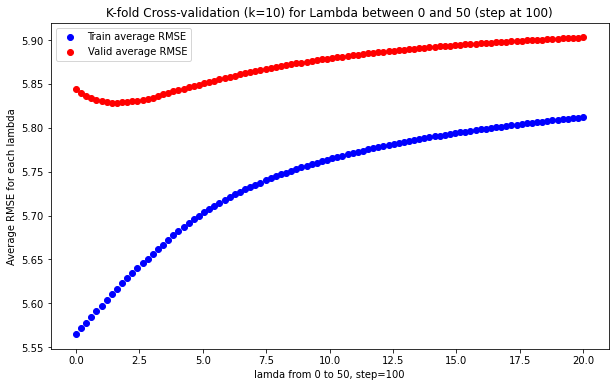

In [54]:
plt.figure(figsize=(10,6))
plt.scatter(lambda_range, train_RMSE, c='b', label='Train average RMSE')
plt.scatter(lambda_range, valid_RMSE, c='r', label='Valid average RMSE')
plt.legend(loc='upper left')
plt.xlabel('lamda from 0 to 50, step=100')
plt.ylabel('Average RMSE for each lambda')
plt.title('K-fold Cross-validation (k=10) for Lambda between 0 and 50 (step at 100)')
plt.show()

In [55]:
print('Value of lambda minimizes your cross-validated (test) RMSE')
index = valid_RMSE.index(min(valid_RMSE))
print(lambda_range[index])

Value of lambda minimizes your cross-validated (test) RMSE
1.6161616161616161


In [61]:
features2 = ['RM','CRIM','DIS','RM*RM','CRIM*RM','NOX*NOX','CHAS','TAX*B']

x_train3 = x_train.loc[:,features2]
y_train3 = y_train.copy()

alpha_initial = 0
beta_initial = np.zeros(len(features2))

alpha, beta = multivariate_ridge_ols(x_train3, y_train3, alpha_initial, beta_initial,epsilon=0.0001,lambda_reg = 1.6161616161616161, R=0.02,MaxIterations=10000)
print('alpha = {:.2f}'.format(alpha))
print('betas')
print(beta)

Total Iterations: 10000
Time taken: 4.48 seconds
alpha = 22.80
betas
[-4.53811433  3.79124062 -0.07513553 10.78576988 -5.83767541 -1.41001296
  0.99890855  0.38956247]


In [62]:
y_train_predict3 = alpha + np.dot(x_train3,beta)

x_test3 = x_test.loc[:,features2]
y_test3 = y_test.copy()

y_test_predict3 = alpha + np.dot(x_test3,beta)

print('RMSE on the training set')
print(compute_rmse(y_train_predict3,y_train3))
print()
print('RMSE on the test set')
print(compute_rmse(y_test_predict3,y_test3))

RMSE on the training set
5.629423782241314

RMSE on the test set
5.60745306923092


The RMSE from 4.4 is 5.61.  
The RMSE from 4.3 is 5.49.   
The RMSE from 4.2 is 5.43.   
The RMSE from 3.2 is 6.15 and the RMSE from the 5-Nearst-Neighbors is 4.97.

The increase in lambda_reg, the model is becoming less complex and accurate, and thus the rmse is increasing.

###  Extra Credit 2: AdaGrad

AdaGrad is a method to implement gradient descent with different learning rates for each feature. Adaptive algorithms like this one are being extensively used especially in neural network training. Implement AdaGrad on 2.3 but now use CRIM, RM and DIS as independent variables. Standardize these variables before inputting them to the gradient descent algorithm. Tune the algorithm until you estimate the regression coefficients within a tolerance of 1e-1. Use mini-batch gradient descent in this implementation. In summary for each parameter (in our case one intercept and three slopes) the update step of the gradient (in this example $\beta_j$) at iteration $k$ of the GD algorithm becomes:

$$\beta_j=\beta_j -\frac{R}{\sqrt{G^{(k)}_j}}\frac{\partial J(\alpha,\beta_1,\ldots)}{\partial \beta_j}$$ where
$G^{(k)}_j=\sum_{i=1}^{k} (\frac{\partial J^{(i)}(\alpha,\beta_1,\ldots)}{\partial \beta_j})^2$ and $R$ is your learning rate. The notation $\frac{\partial J^{(i)}(\alpha,\beta_1,\ldots)}{\partial \beta_j}$ corresponds to the value of the gradient at iteration $(i)$. Essentially we are "storing" information about previous iteration gradients. Doing that we effectively decrease the learning rate slower when a feature $x_i$ is sparse (i.e. has many zero values which would lead to zero gradients). Although this method is not necessary for our regression problem, it is good to be familiar with these methods as they are widely used in neural network training.  

In [41]:
# Your code here

*Discuss your results here*